##### 1 Data Cleaning:
Drop Rows with Missing Values: Remove rows with missing values in critical columns.
Fill Missing Values: Fill missing values in other columns with the mode (most frequent value).
Convert Date Columns: Convert date columns to datetime format and drop rows with invalid dates.
Remove Duplicates: Check for and remove duplicate rows.
Check for Outliers: Visualize and optionally remove outliers in numerical columns using boxplots and IQR.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the dataset
df = pd.read_csv('loan.csv')

In [3]:
# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

First few rows of the dataframe:
     customer_id     loan_id      loan_type  loan_amount  interest_rate  \
0  CUST-00004912  LN00004170       Car Loan        16795       0.051852   
1  CUST-00004194  LN00002413  Personal Loan         1860       0.089296   
2  CUST-00003610  LN00000024  Personal Loan        77820       0.070470   
3  CUST-00001895  LN00001742       Car Loan        55886       0.062155   
4  CUST-00003782  LN00003161      Home Loan         7265       0.070635   

   loan_term employment_type income_level  credit_score  gender  \
0         15   Self-employed       Medium           833    Male   
1         56       Full-time       Medium           776  Female   
2         51       Full-time          Low           697    Male   
3         30       Full-time          Low           795  Female   
4         48       Part-time          Low           519  Female   

  marital_status education_level application_date approval_date  \
0         Single          Master       05-04-2

In [4]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
customer_id          0
loan_id              0
loan_type            0
loan_amount          0
interest_rate        0
loan_term            0
employment_type      0
income_level         0
credit_score         0
gender               0
marital_status       0
education_level      0
application_date     0
approval_date        0
disbursement_date    0
due_date             0
default_status       0
dtype: int64


In [5]:
# Data Cleaning
# Drop rows with missing values in critical columns (if any)
critical_columns = ['loan_amount', 'interest_rate', 'loan_term', 'credit_score', 'default_status']
df.dropna(subset=critical_columns, inplace=True)

In [8]:
# Data Cleaning
# Drop rows with missing values in critical columns (if any)
critical_columns = ['loan_amount', 'interest_rate', 'loan_term', 'credit_score', 'default_status']
df.dropna(subset=critical_columns, inplace=True)
df.info()
print(df.describe())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        5000 non-null   object        
 1   loan_id            5000 non-null   object        
 2   loan_type          5000 non-null   object        
 3   loan_amount        5000 non-null   int64         
 4   interest_rate      5000 non-null   float64       
 5   loan_term          5000 non-null   int64         
 6   employment_type    5000 non-null   object        
 7   income_level       5000 non-null   object        
 8   credit_score       5000 non-null   int64         
 9   gender             5000 non-null   object        
 10  marital_status     5000 non-null   object        
 11  education_level    5000 non-null   object        
 12  application_date   1961 non-null   datetime64[ns]
 13  approval_date      5000 non-null   datetime64[ns]
 14  disburse

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,2018-05-04,2018-04-23,2018-04-24,2018-08-14,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,NaT,2022-12-31,2023-01-12,2023-04-05,False
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,NaT,2019-11-18,2019-11-27,2020-02-24,False
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,NaT,2021-09-08,2021-09-11,2022-02-25,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,2020-02-09,2020-09-07,2020-09-11,2020-12-29,False


In [9]:
# Convert date columns to datetime format
df['application_date'] = pd.to_datetime(df['application_date'], errors='coerce')
df['approval_date'] = pd.to_datetime(df['approval_date'], errors='coerce')
df['disbursement_date'] = pd.to_datetime(df['disbursement_date'], errors='coerce')
df['due_date'] = pd.to_datetime(df['due_date'], errors='coerce')

In [10]:
# Drop rows with invalid dates
df = df.dropna(subset=['application_date', 'approval_date', 'disbursement_date', 'due_date'])

In [11]:
# Check for duplicates and remove if any
print("\nNumber of duplicates before removal:", df.duplicated().sum())
df = df.drop_duplicates()
print("Number of duplicates after removal:", df.duplicated().sum())
df


Number of duplicates before removal: 0
Number of duplicates after removal: 0


,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,2018-05-04,2018-04-23,2018-04-24,2018-08-14,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,2020-02-09,2020-09-07,2020-09-11,2020-12-29,False
6,CUST-00004571,LN00003372,Car Loan,38194,0.070929,26,Part-time,High,689,Male,Married,PhD,2021-04-09,2021-09-21,2021-10-04,2021-12-18,False
9,CUST-00000009,LN00003352,Education Loan,61263,0.099123,56,Self-employed,Low,430,Male,Divorced,PhD,2021-07-08,2021-08-25,2021-09-01,2022-02-09,False
10,CUST-00001863,LN00000461,Personal Loan,17023,0.089773,34,Full-time,High,412,Female,Divorced,Bachelor,2022-04-07,2022-07-19,2022-07-23,2023-01-04,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,CUST-00000191,LN00001089,Car Loan,26307,0.067303,57,Part-time,Medium,565,Female,Married,Master,2019-07-01,2019-01-29,2019-01-31,2019-06-09,True
4991,CUST-00001874,LN00001327,Personal Loan,97371,0.089119,13,Part-time,Low,654,Male,Single,Bachelor,2018-05-11,2018-11-10,2018-11-21,2019-01-31,False
4994,CUST-00000155,LN00003357,Education Loan,38548,0.101704,14,Full-time,Low,620,Male,Married,Master,2018-12-04,2018-04-15,2018-04-19,2018-07-17,True
4996,CUST-00004094,LN00001068,Personal Loan,48937,0.056405,50,Part-time,Medium,502,Male,Single,PhD,2018-12-05,2018-05-17,2018-05-27,2018-11-20,False


##### 2.Data Preprocessing:
Define categorical and numerical columns.
Create preprocessing pipelines for numeric and categorical data.
Use ColumnTransformer to apply the appropriate transformations to each type of column.

In [12]:
# Data Preprocessing
# Define categorical and numerical columns
categorical_cols = ['loan_type', 'employment_type', 'income_level', 'gender', 'marital_status', 'education_level']
numerical_cols = ['loan_amount', 'interest_rate', 'loan_term', 'credit_score']

In [13]:
print(categorical_cols)
print(numerical_cols)

['loan_type', 'employment_type', 'income_level', 'gender', 'marital_status', 'education_level']
['loan_amount', 'interest_rate', 'loan_term', 'credit_score']


In [14]:
# Create preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

In [15]:
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [16]:
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [17]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['loan_amount', 'interest_rate', 'loan_term',
                                  'credit_score']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['loan_type', 'employment_type',
                                  'income_level', 'gender', 'marital_status',
                                  'education_level'])])

##### 3.Model Training and Evaluation:
Split the data into features and target variable.
Split the data into training and testing sets.
Create a pipeline that includes preprocessing and a logistic regression classifier.
Train the model on the training data.
Make predictions on the test data.
Evaluate the model using confusion matrix, classification report, and accuracy score.
Extract and plot feature importance from the logistic regression model.

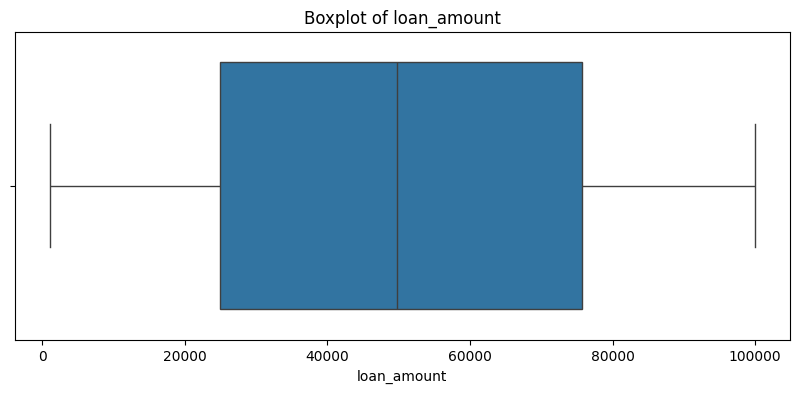

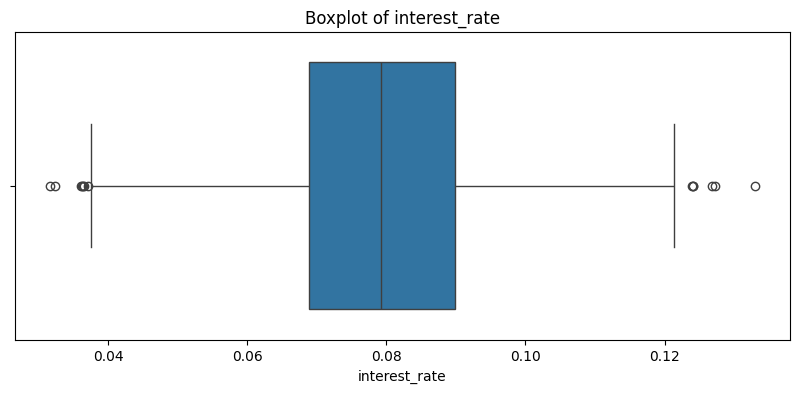

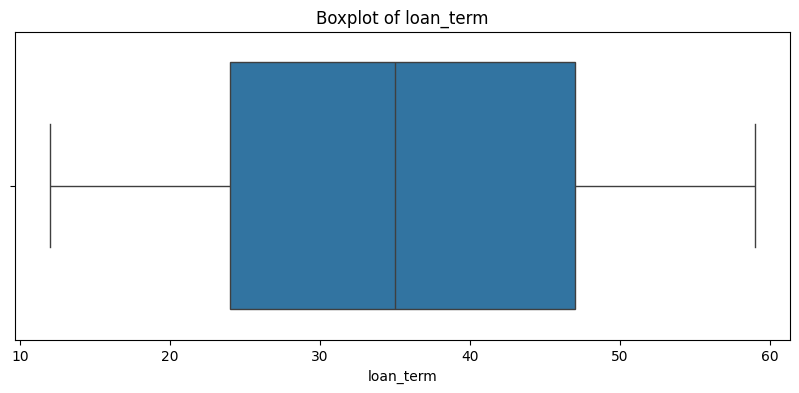

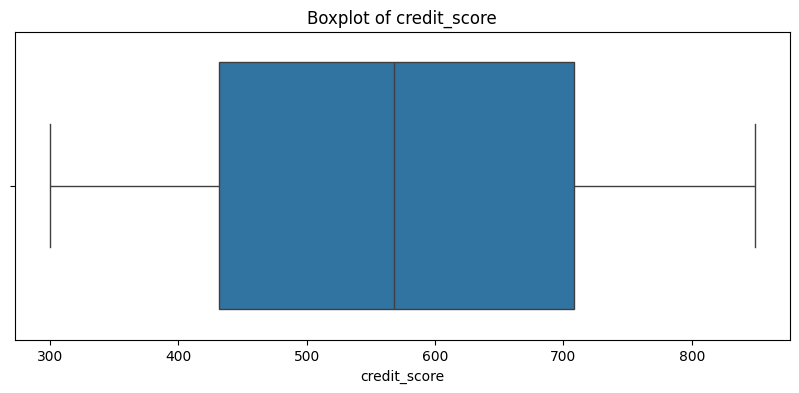

In [19]:
# Check for outliers in numerical columns
numerical_cols = ['loan_amount', 'interest_rate', 'loan_term', 'credit_score']
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [20]:
# Split the data into features and target variable
X = df.drop(columns=['default_status', 'application_date', 'approval_date', 'disbursement_date', 'due_date'])
y = df['default_status']

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Create a pipeline that applies the preprocessing and then fits a logistic regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

In [23]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amount',
                                                   'interest_rate', 'loan_term',
                                                   'credit_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['loan_type',
                                                   'employment_type',
                                                   'income_level', 'gender',
                                                   'marital_status',
                                                   'education_level'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [24]:
# Make predictions
y_pred = model.predict(X_test)

In [25]:
# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[312   0]
 [ 81   0]]

Classification Report:
              precision    recall  f1-score   support

       False       0.79      1.00      0.89       312
        True       0.00      0.00      0.00        81

    accuracy                           0.79       393
   macro avg       0.40      0.50      0.44       393
weighted avg       0.63      0.79      0.70       393


Accuracy Score:
0.7938931297709924


C:\Users\seong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\seong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\seong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [26]:
# Feature Importance
feature_importance = pd.Series(model.named_steps['classifier'].coef_[0], index=preprocessor.get_feature_names_out())
feature_importance = feature_importance.sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
cat__loan_type_Car Loan               0.156024
cat__marital_status_Single            0.151543
cat__loan_type_Home Loan              0.149403
cat__marital_status_Married           0.091308
cat__education_level_Bachelor         0.085024
cat__income_level_Low                 0.060267
cat__gender_Male                      0.045745
cat__income_level_High                0.036700
num__loan_amount                      0.036275
cat__employment_type_Part-time        0.033626
cat__employment_type_Self-employed    0.011394
cat__education_level_PhD             -0.001886
num__interest_rate                   -0.010968
num__credit_score                    -0.025409
cat__education_level_Master          -0.029309
cat__employment_type_Full-time       -0.045959
cat__gender_Female                   -0.046684
cat__education_level_High School     -0.054767
num__loan_term                       -0.059438
cat__loan_type_Personal Loan         -0.095779
cat__income_level_Medium             -0

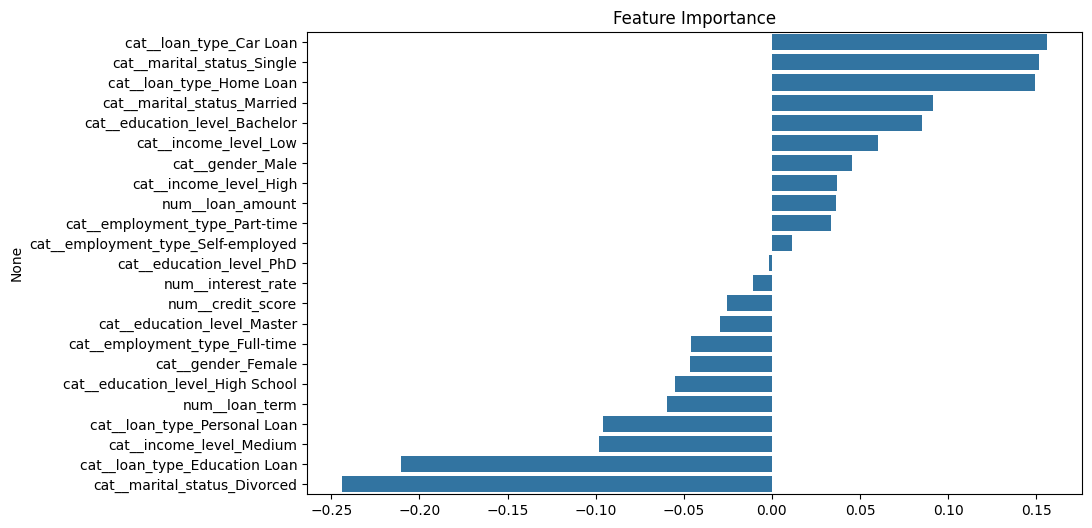

In [28]:
 #Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()

In [2]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.shapes import MSO_SHAPE
from pptx.dml.color import RGBColor

# Create a presentation object
prs = Presentation()

# Define a function to add a title slide
def add_title_slide(prs, title, subtitle, name, date):
    slide_layout = prs.slide_layouts[0]
    slide = prs.slides.add_slide(slide_layout)
    title_placeholder = slide.shapes.title
    subtitle_placeholder = slide.placeholders[1]
    title_placeholder.text = title
    subtitle_placeholder.text = f"{subtitle}\n{name} | {date}"

# Define a function to add a content slide
def add_content_slide(prs, title, bullet_points):
    slide_layout = prs.slide_layouts[1]
    slide = prs.slides.add_slide(slide_layout)
    title_shape = slide.shapes.title
    content_shape = slide.placeholders[1]
    title_shape.text = title
    content_shape.text = "\n".join(bullet_points)

# Slide 1: Title Slide
add_title_slide(prs, "Heart Disease Prediction Capstone Project", "Data Analysis and Machine Learning for Healthcare", "[Your Name]", "[Presentation Date]")

# Slide 2: Project Overview
add_content_slide(prs, "Project Overview", [
    "Objective: Predict the presence of heart disease using medical and lifestyle factors.",
    "Importance: Heart disease is a leading cause of mortality. Early detection can significantly improve patient outcomes.",
    "Dataset: Includes features like age, cholesterol, blood pressure, smoking, alcohol consumption, etc."
])

# Slide 3: Data Cleaning and Preparation
add_content_slide(prs, "Data Cleaning and Preparation", [
    "Handling Missing Values:",
    "- Numerical: Imputed with mean",
    "- Categorical: Imputed with mode",
    "Date Conversion: Converted to datetime, handled invalid dates",
    "Feature Engineering: Age converted from days to years, height unit corrected"
])

# Slide 4: Exploratory Data Analysis (EDA)
add_content_slide(prs, "Exploratory Data Analysis (EDA)", [
    "Visualizations:",
    "- Boxplots: Cholesterol, Age, Weight, Blood Pressure vs Heart Disease",
    "- Count plots: Smoking and Alcohol vs Heart Disease",
    "Key Findings: Highlighted patterns and correlations in data"
])

# Slide 5: Machine Learning Model Building
add_content_slide(prs, "Machine Learning Model Building", [
    "Models Evaluated: Logistic Regression, Decision Tree, Random Forest, SVM, XGBoost",
    "Model Training: Data split into training and testing sets"
])

# Slide 6: Model Evaluation Metrics
add_content_slide(prs, "Model Evaluation Metrics", [
    "Metrics Used: Accuracy and ROC AUC",
    "Results Table: Model performance summary",
    "ROC Curves: Visual comparison of all models"
])

# Slide 7: Feature Importance
add_content_slide(prs, "Feature Importance", [
    "Important Features from Random Forest and XGBoost",
    "Key Drivers of Heart Disease Prediction identified"
])

# Slide 8: Conclusion and Recommendations
add_content_slide(prs, "Conclusion and Recommendations", [
    "Summary: ML models effectively predicted heart disease",
    "Best Model: [Model Name] based on metrics",
    "Recommendations: Focus on key risk factors like [list key features]"
])

# Slide 9: Future Work
add_content_slide(prs, "Future Work", [
    "Potential Improvements: More data, advanced algorithms, feature engineering",
    "Real-World Applications: Use in healthcare for early detection and prevention"
])

# Slide 10: Thank You
add_content_slide(prs, "Thank You", [
    "Contact: [Your Email]",
    "Acknowledgements: Trainer, tools, and resources used"
])

# Save the presentation
pptx_path = r"C:\CapstoneProject\Project 2 - Healthcare - Predictive Analytics\Dataset-Project2Heart_Disease_Prediction_Capstone_Project.pptx"
prs.save(pptx_path)
pptx_path


'C:\\Users\\seong\\Desktop\\Jupyter-SF\\CapstoneProject\\Project 2 - Healthcare - Predictive Analytics\\Dataset-Project2Heart_Disease_Prediction_Capstone_Project.pptx'